In [5]:
import tensorflow as tf
import tensorflow.keras as keras


In [26]:
#from tensorflow.keras.utils import utils




In [9]:
import numpy as np
import tensorflow.keras as keras

In [10]:
fashion_mnist=keras.datasets.fashion_mnist

In [12]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [13]:
from matplotlib import pyplot

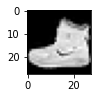

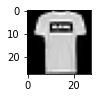

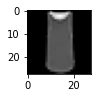

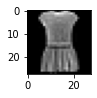

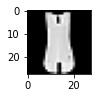

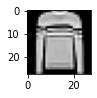

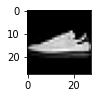

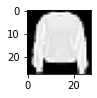

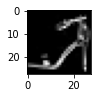

In [14]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [15]:
x_train = np.array(train_X)
y_train = np.array(train_y)

#x_val = np.array(x_val)
#y_val = np.array(y_val)

x_test = np.array(test_X)
y_test = np.array(test_y)


In [16]:
print(x_train.shape)
print(y_train.shape)
#print(x_val.shape)
#print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
---
(28, 28)


In [27]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [29]:
x_train = np.array(X_train)
y_train = np.array(y_train)

x_val = np.array(X_val)
y_val = np.array(y_val)

x_test = np.array(X_test)
y_test = np.array(y_test)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(48999, 28, 28)
(48999,)
(14000, 28, 28)
(14000,)
(7001, 28, 28)
(7001,)
---
(28, 28)


In [31]:
img_width, img_height = 28,28

In [32]:
num_classes = 10

In [33]:
x_train[0].max()

255

In [34]:
x_train = x_train.reshape(-1, img_width, img_height, 1)
x_test = x_test.reshape(-1, img_width, img_height, 1)
x_val = x_val.reshape(-1, img_width, img_height, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_val = x_val.astype("float32")

x_train = (x_train / 255.0) 
x_test = (x_test / 255.0)
x_val = (x_val / 255.0)

#tf.keras.utils.to_categorical(y, num_classes=None, dtype="float32")
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

In [35]:
x_train[0].max()

1.0

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(48999, 28, 28, 1)
(48999, 10)
(14000, 28, 28, 1)
(14000, 10)
(7001, 28, 28, 1)
(7001, 10)
---
(28, 28, 1)


In [42]:
loading = True
dataset = "fashion"
if (not loading):
    save_dir = "D:/guided-retraining/data/"+dataset+"/x_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, x_train)

    save_dir = "D:/guided-retraining/data/"+dataset+"/y_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, y_train)

    save_dir = "D:/guided-retraining/data/"+dataset+"/x_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, x_test)
    save_dir = "D:/guided-retraining/data/"+dataset+"/y_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, y_test)

    save_dir = "D:/guided-retraining/data/"+dataset+"/x_val.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, x_val)

    save_dir = "D:/guided-retraining/data/"+dataset+"/y_val.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, y_val)

In [ ]:
import utils_guided_retraining2 as utils
x_train,y_train = utils.get_data(dataset,"Train")
x_val,y_val = utils.get_data(dataset,"Val")
x_test,y_test = utils.get_data(dataset,"Test")

## Training a CNN model

In [18]:
num_classes

10

In [37]:
#28/04
model_0 = keras.models.Sequential([
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                   
                                 keras.layers.Dropout(0.25), 

                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(128, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 
                                 keras.layers.Dense(10, activation = 'softmax')
])

In [38]:
model_0.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #change adam

In [39]:
history = model_0.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/10
766/766 [==============================] - 111s 142ms/step - loss: 0.4741 - accuracy: 0.8368 - val_loss: 0.2963 - val_accuracy: 0.8902
Epoch 2/10
766/766 [==============================] - 109s 142ms/step - loss: 0.3108 - accuracy: 0.8924 - val_loss: 0.2578 - val_accuracy: 0.9069
Epoch 3/10
766/766 [==============================] - 111s 145ms/step - loss: 0.2758 - accuracy: 0.9051 - val_loss: 0.2359 - val_accuracy: 0.9143
Epoch 4/10
766/766 [==============================] - 111s 144ms/step - loss: 0.2620 - accuracy: 0.9115 - val_loss: 0.2412 - val_accuracy: 0.9132
Epoch 5/10
766/766 [==============================] - 110s 143ms/step - loss: 0.2595 - accuracy: 0.9136 - val_loss: 0.3291 - val_accuracy: 0.9059
Epoch 6/10
766/766 [==============================] - 107s 140ms/step - loss: 0.2607 - accuracy: 0.9145 - val_loss: 0.2587 - val_accuracy: 0.9114
Epoch 7/10
766/766 [==============================] - 106s 139ms/step - loss: 0.2629 - accuracy: 0.9140 - val_loss: 0.2497 -

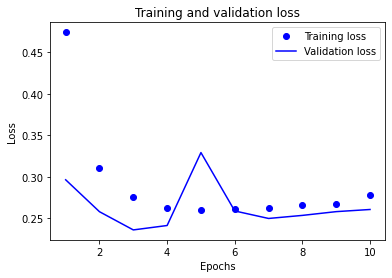

In [43]:
# plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

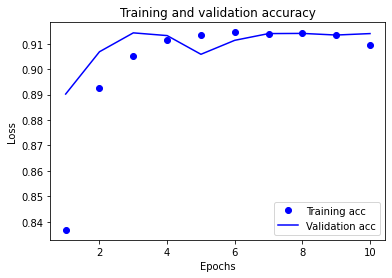

In [44]:
# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
results = model_0.evaluate(x_test,y_test)

219/219 [==============================] - 4s 19ms/step - loss: 0.2683 - accuracy: 0.9129


In [46]:
model_0.save("D:/guided-retraining/models/model_fashion_0")

INFO:tensorflow:Assets written to: D:/guided-retraining/models/model_fashion_0\assets


In [48]:
#28/04
model_1 = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    #tf.keras.layers.Dense(128,activation= tf.keras.layers.LeakyReLU(alpha=0.3)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax'),
])



In [49]:
model_1.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
history = model_1.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/10
766/766 [==============================] - 49s 62ms/step - loss: 0.8045 - accuracy: 0.7120 - val_loss: 0.4442 - val_accuracy: 0.8277
Epoch 2/10
766/766 [==============================] - 48s 62ms/step - loss: 0.5095 - accuracy: 0.8201 - val_loss: 0.3596 - val_accuracy: 0.8676
Epoch 3/10
766/766 [==============================] - 47s 61ms/step - loss: 0.4245 - accuracy: 0.8536 - val_loss: 0.3274 - val_accuracy: 0.8784
Epoch 4/10
766/766 [==============================] - 48s 63ms/step - loss: 0.3799 - accuracy: 0.8686 - val_loss: 0.3014 - val_accuracy: 0.8903
Epoch 5/10
766/766 [==============================] - 47s 61ms/step - loss: 0.3538 - accuracy: 0.8768 - val_loss: 0.2976 - val_accuracy: 0.8928
Epoch 6/10
766/766 [==============================] - 46s 61ms/step - loss: 0.3302 - accuracy: 0.8867 - val_loss: 0.2922 - val_accuracy: 0.8894
Epoch 7/10
766/766 [==============================] - 48s 63ms/step - loss: 0.3127 - accuracy: 0.8930 - val_loss: 0.2631 - val_accuracy:

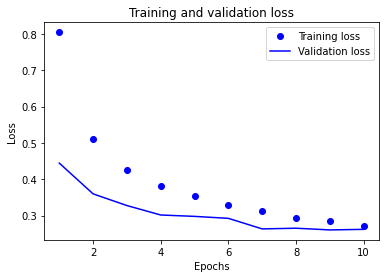

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

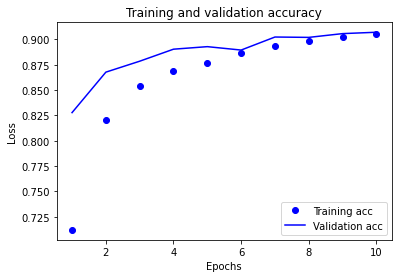

In [52]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
results = model_1.evaluate(x_test,y_test)

219/219 [==============================] - 3s 11ms/step - loss: 0.2600 - accuracy: 0.9084


In [54]:
model_1.save("D:/guided-retraining/models/model_fashion_1")

INFO:tensorflow:Assets written to: D:/guided-retraining/models/model_fashion_1\assets


In [57]:
model_2 = keras.models.Sequential([
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'),
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                   
                                 keras.layers.Dropout(0.25), 

                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(128, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(64,activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation = 'softmax')
])

In [58]:
model_2.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [59]:
history = model_2.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/10
766/766 [==============================] - 66s 85ms/step - loss: 0.7872 - accuracy: 0.7177 - val_loss: 0.4070 - val_accuracy: 0.8486
Epoch 2/10
766/766 [==============================] - 65s 85ms/step - loss: 0.4789 - accuracy: 0.8361 - val_loss: 0.3402 - val_accuracy: 0.8710
Epoch 3/10
766/766 [==============================] - 64s 84ms/step - loss: 0.4096 - accuracy: 0.8602 - val_loss: 0.2978 - val_accuracy: 0.8924
Epoch 4/10
766/766 [==============================] - 65s 84ms/step - loss: 0.3707 - accuracy: 0.8729 - val_loss: 0.2654 - val_accuracy: 0.8994
Epoch 5/10
766/766 [==============================] - 66s 86ms/step - loss: 0.3402 - accuracy: 0.8830 - val_loss: 0.2678 - val_accuracy: 0.9006
Epoch 6/10
766/766 [==============================] - 65s 85ms/step - loss: 0.3221 - accuracy: 0.8893 - val_loss: 0.2518 - val_accuracy: 0.9102
Epoch 7/10
766/766 [==============================] - 65s 85ms/step - loss: 0.3059 - accuracy: 0.8949 - val_loss: 0.2485 - val_accuracy:

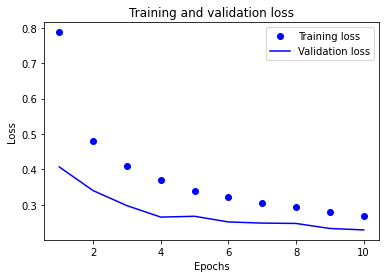

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

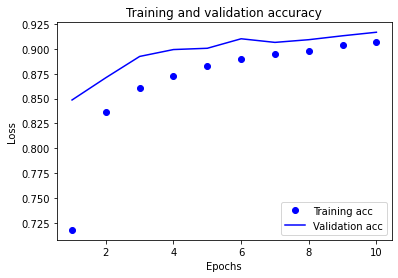

In [61]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
results = model_2.evaluate(x_test,y_test)

219/219 [==============================] - 3s 14ms/step - loss: 0.2254 - accuracy: 0.9190


In [64]:
# This model will be used to apply the retraining method
model_2.save("D:/guided-retraining/models/model_fashion_2")

INFO:tensorflow:Assets written to: D:/guided-retraining/models/model_fashion_2\assets
